Author: Chelsey Macaulay

Class/Section: DSCI 100-003


Summer 2025 Term 1


Due June 23rd, 2025

**TITLE:** *Predicting Chance of Subscription to Game Newsletter based on Player's Characteristics*

**Introduction**

*Background*





To start this data analysis, I will load the necessary libraries. 

In [15]:
library(tidyverse)
library(tidymodels)
library(repr)

In [16]:
getwd()

[1] "/home/jovyan/work/dsci-100-2025s1"

Now, I will load in the data we will begin analyzing. The "players" data will contain all information regarding the players on the server.

In [60]:
players <- read_csv("players.csv")
# players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Now that we have visualized the data, we will make it tidy for our purposes. 

In [61]:
players_tidy <- players |>
    select(experience, subscribe, gender, Age) |>
    mutate(subscribe = as_factor(subscribe)) |>
    filter(gender != "Prefer not to say", gender != "Other")
players_tidy 

experience,subscribe,gender,Age
<chr>,<fct>,<chr>,<dbl>
Pro,TRUE,Male,9
Veteran,TRUE,Male,17
Veteran,FALSE,Male,17
Amateur,TRUE,Female,21
Regular,TRUE,Male,21
Amateur,TRUE,Female,17
Regular,TRUE,Female,19
Amateur,FALSE,Male,21
Amateur,TRUE,Male,17


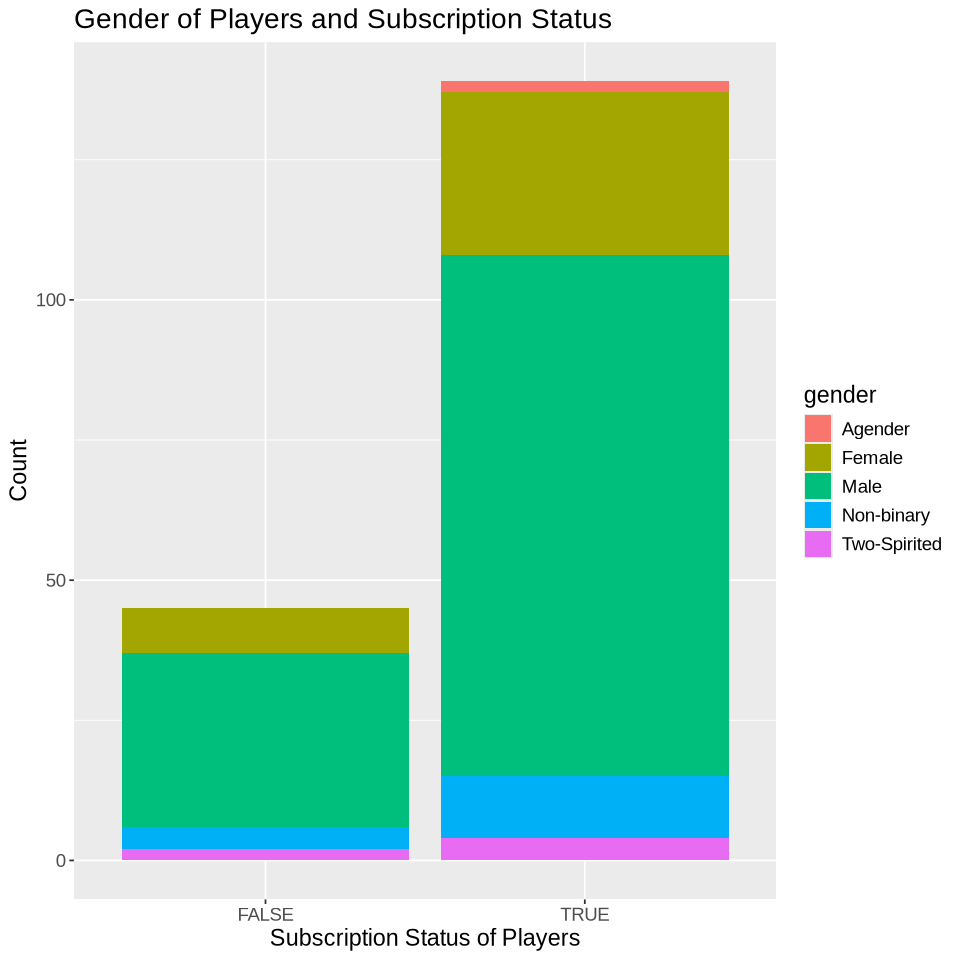

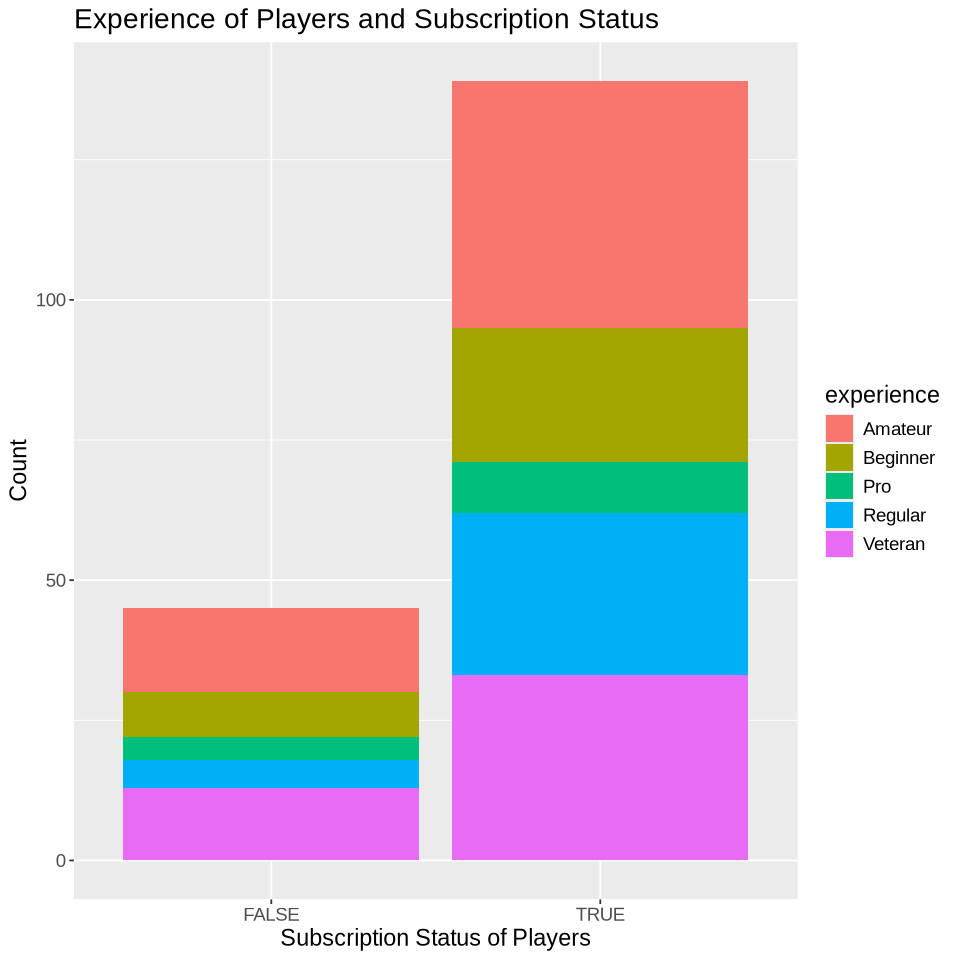

In [54]:
options(repr.plot.height = 8, repr.plot.width = 8)
experience_viz <- ggplot(players_tidy, aes(x = experience)) +
    geom_bar() 
# experience_viz

gender_viz <- ggplot(players_tidy, aes(x = gender)) +
    geom_bar()
# gender_viz

age_viz <- ggplot(players_tidy, aes(x = Age)) +
    geom_histogram(binwidth = 5) 
# age_viz

subscribe_gender_viz <- ggplot(players_tidy, aes(x = subscribe, fill = gender)) +
    geom_bar() +
    labs(x = "Subscription Status of Players", 
         y = "Count",
         title = "Gender of Players and Subscription Status") +
    theme(text = element_text(size = 14))
subscribe_gender_viz

subscribe_experience_viz <- ggplot(players_tidy, aes(x = subscribe, fill = experience)) +
    geom_bar() +
    labs(x = "Subscription Status of Players", 
         y = "Count",
         title = "Experience of Players and Subscription Status") +
    theme(text = element_text(size = 14))
subscribe_experience_viz

The data is now tidy. For this analysis, I removed any variables we are not interested in and filtered out the gender's of not preferred to say and other 

In [68]:
set.seed(2025)

players_split <- initial_split(players_tidy, prop = 0.70, strata = subscribe)
players_training <- training(players_split)
players_testing <- testing(players_split)

In [70]:
players_recipe <- recipe(subscribe ~ ., data = players_training) |>
    step_scale(Age) |>
    step_center(Age)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
    set_engine("kknn") |>
    set_mode("classification")

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    fit(data = players_training)

In [72]:
players_predictions <- predict(players_fit, players_testing) |>
    bind_cols(players_testing)
players_predictions

.pred_class,experience,subscribe,gender,Age
<fct>,<chr>,<fct>,<chr>,<dbl>
TRUE,Amateur,FALSE,Male,21
FALSE,Amateur,TRUE,Male,17
TRUE,Veteran,TRUE,Female,23
TRUE,Regular,TRUE,Female,28
TRUE,Veteran,FALSE,Male,18
TRUE,Amateur,TRUE,Male,24
TRUE,Beginner,FALSE,Male,24
TRUE,Veteran,TRUE,Male,21
FALSE,Amateur,FALSE,Male,18


In [73]:
players_metrics <- players_predictions |>
    metrics(truth = subscribe, estimate = .pred_class)
players_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7142857
kap,binary,0.1111111


In [74]:
players_matrix <- players_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)
players_matrix

          Truth
Prediction FALSE TRUE
     FALSE     3    5
     TRUE     11   37

In [76]:
players_result <- tibble(accuracy = 71.23, precision = 37/(11+37), recall = 37/(5+37))
players_result

accuracy,precision,recall
<dbl>,<dbl>,<dbl>
71.23,0.7708333,0.8809524
